## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding & Exploration

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Check for Missing Values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Check Datatypes
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [6]:
# Basic statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

In [9]:
df_copy = df.copy()

# scaling Features
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_copy[['Annual Income (k$)', 'Spending Score (1-100)']] = min_max_scaler.fit_transform(df_copy[['Annual Income (k$)', 'Spending Score (1-100)']])
df_copy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


## Exploratory Data Analysis (EDA)

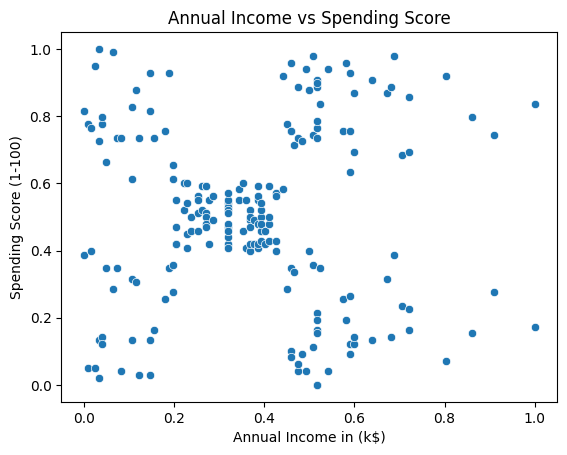

In [10]:
# Scatter Plot of annual income vs spending score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_copy)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income in (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

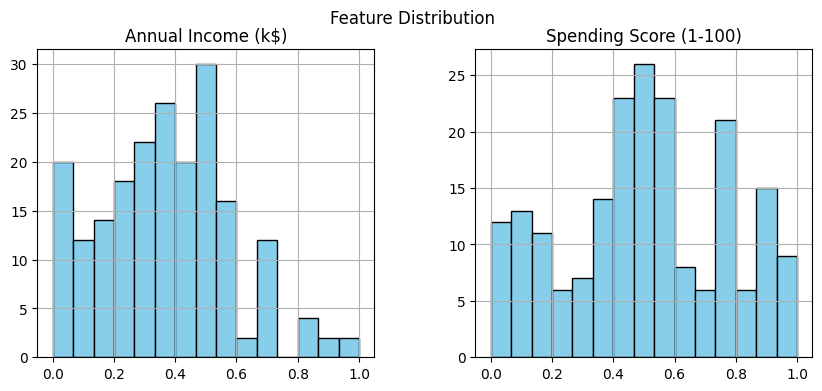

In [12]:
# Feature Distribution

df_copy[['Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=15,color = 'skyblue', edgecolor ='black', figsize=(10,4) )
plt.suptitle('Feature Distribution')
plt.show()

## Determining Optimal Number of Clusters (K-Means)

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df_copy[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
silhouette_scores = []
k_values = range(2,11)

In [14]:
for k in k_values :
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

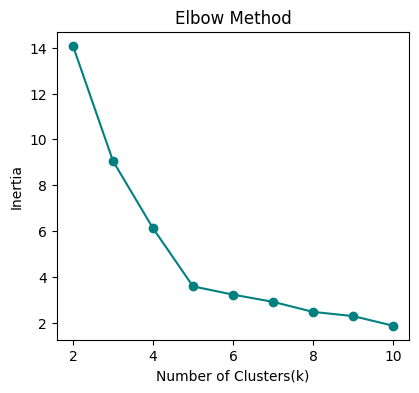

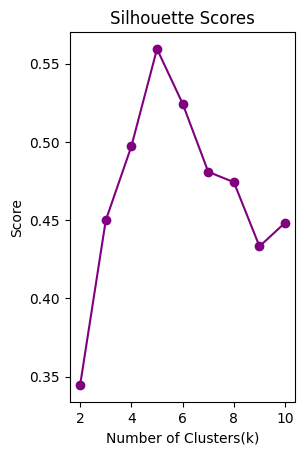

In [16]:
# PLot Elbow Method
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker = 'o', color = 'teal')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.show()

# plot Silhouette Scores
plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker = 'o', color = 'purple')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Score')
plt.show()

##  K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

optimal_k = 5
X = df_copy[['Annual Income (k$)', 'Spending Score (1-100)']]

# apply Kmeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_copy['cluster'] = kmeans.fit_predict(X)

In [21]:
df_copy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,2
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,2
4,5,Female,31,0.016393,0.397959,4


In [ ]:
df_copy['cluster'].value_counts() # See Number of Clusters

cluster
0    81
1    39
3    36
4    22
2    22
Name: count, dtype: int64

## Visualize Clusters using 2D plots

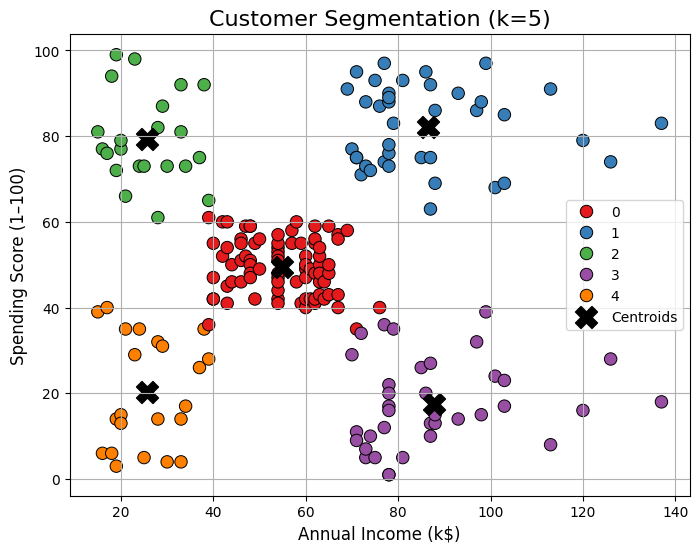

In [29]:
# Transform the scaled features back to original for plotting
df['cluster'] = df_copy['cluster']  # copy cluster labels

# Plot customers in original scale
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluster',
    palette='Set1',
    s=80,
    edgecolor='black'
)

# Plot centroids in original scale
centers_scaled = kmeans.cluster_centers_
centers_original = min_max_scaler.inverse_transform(centers_scaled)

plt.scatter(
    centers_original[:, 0],
    centers_original[:, 1],
    s=250,
    c='black',
    marker='X',
    label='Centroids'
)

# Formatting
plt.title(f'Customer Segmentation (k={optimal_k})', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1–100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [30]:
print(f"Silhouette Score: {silhouette_score(X, kmeans.labels_):.3f}")
print(f"Inertia (WCSS): {kmeans.inertia_:.3f}")

Silhouette Score: 0.559
Inertia (WCSS): 3.585


## Bonus – Trying DBSCAN (Density-Based Clustering)

DBSCAN found 5 clusters (excluding noise).


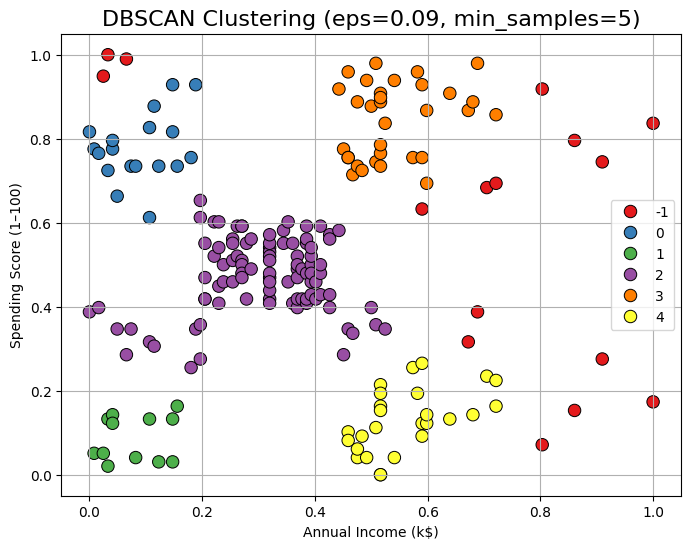

In [45]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.09, min_samples=5)  # eps is distance threshold in scaled space
dbscan_labels = dbscan.fit_predict(X)

# Add to dataframe
df_copy['dbscan_cluster'] = dbscan_labels

# Count clusters (excluding noise)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN found {n_clusters_dbscan} clusters (excluding noise).")

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_copy,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='dbscan_cluster',
    palette='Set1',
    s=80,
    edgecolor='black'
)
plt.title(f'DBSCAN Clustering (eps=0.09, min_samples=5)', fontsize=16)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.grid(True)
plt.show()


## Bonus - Analyzing Average Spending per Cluster

In [49]:
# Group by K-Means cluster and calculate averages
cluster_summary = df.groupby('cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'}).reset_index()

print(cluster_summary)


   cluster  Annual Income (k$)  Spending Score (1-100)  Customer Count
0        0           54.888889               49.543210              81
1        1           86.538462               82.128205              39
2        2           25.727273               79.363636              22
3        3           87.750000               17.583333              36
4        4           25.727273               20.227273              22
